This script contains the following:¶

1. Importing Visualization Libraries and Data

2. Data Cleaning

3. Exploring Relationships
 Correlations
 Scatterplots
 Pair Plots
 Categorical Plots

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
matplotlib.__version__

'3.7.0'

In [3]:
# Ensure charts are displayed without having to call them specifically

%matplotlib inline

In [16]:
df = pd.read_csv(r'/Users/pedropaulo/Desktop/Tasks CF/New York Citi Bikes Project/Data/CitiBike_Clean.csv', sep = ';')

In [27]:
df.head()

,Unnamed: 0,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,...,Gender_Cat,start_year,start_month,start_week,start_day,end_year,end_month,end_week,end_day,end_hour
0,0,16013,Mon,18,09/09/13 18:18,523,W 38 St & 8 Ave,4.075.466.591,-7.399.138.152,09/09/13 18:35,...,Female,2013,9,37,9,2013,9,37,9,18
1,1,15230,Thu,18,12/09/13 18:38,257,Lispenard St & Broadway,4.071.939.226,-7.400.247.214,12/09/13 18:48,...,Male,2013,9,37,12,2013,9,37,12,18
2,2,17942,Wed,19,18/09/13 19:44,479,9 Ave & W 45 St,4.076.019.252,-739.912.551,18/09/13 19:50,...,Male,2013,9,38,18,2013,9,38,18,19
3,3,19683,Sat,11,28/09/13 11:54,527,E 33 St & 1 Ave,4.074.315.566,-7.397.434.726,28/09/13 12:03,...,Female,2013,9,39,28,2013,9,39,28,12
4,4,18024,Sat,18,07/09/13 18:08,521,8 Ave & W 31 St,4.075.044.999,-7.399.481.051,07/09/13 18:46,...,Unknown,2013,9,36,7,2013,9,36,7,18


In [ ]:
# Checking the dataset

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               50000 non-null  int64  
 1   bike_id                  50000 non-null  int64  
 2   weekday                  50000 non-null  object 
 3   start_hour               50000 non-null  int64  
 4   start_time               50000 non-null  object 
 5   start_station_id         50000 non-null  int64  
 6   start_station_name       50000 non-null  object 
 7   start_station_latitude   50000 non-null  object 
 8   start_station_longitude  50000 non-null  object 
 9   end_time                 50000 non-null  object 
 10  end_station_id           50000 non-null  int64  
 11  end_station_name         50000 non-null  object 
 12  end_station_latitude     50000 non-null  object 
 13  end_station_longitude    50000 non-null  object 
 14  trip_duration         

In [ ]:
# Creating subgroup with the availables variables for correlation

In [33]:
df_sub = df[['weekday','start_hour','start_day','trip_duration','start_week','end_week','end_day','end_hour']]

In [34]:
df_sub

,weekday,start_hour,start_day,trip_duration,start_week,end_week,end_day,end_hour
0,Mon,18,9,18,37,37,9,18
1,Thu,18,12,38,37,37,12,18
2,Wed,19,18,44,38,38,18,19
3,Sat,11,28,54,39,39,28,12
4,Sat,18,7,8,36,36,7,18
...,...,...,...,...,...,...,...,...
49995,Sat,18,21,39,38,38,21,20
49996,Sat,17,14,32,37,37,14,17
49997,Sat,18,7,8,36,36,7,18
49998,Sat,13,7,25,36,36,7,14


In [35]:
df_sub.corr()

/var/folders/vy/7wyzrqvj1sbcxy4f8twmkdwc0000gn/T/ipykernel_46914/2510699769.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_sub.corr()


,start_hour,start_day,trip_duration,start_week,end_week,end_day,end_hour
start_hour,1.000000,-0.008020,-0.051391,-0.009147,-0.008610,-0.007776,0.956936
start_day,-0.008020,1.000000,0.000844,0.972479,0.972452,0.999506,-0.006895
trip_duration,-0.051391,0.000844,1.000000,-0.001585,-0.001251,0.000968,-0.015842
start_week,-0.009147,0.972479,-0.001585,1.000000,0.999876,0.971898,-0.008829
end_week,-0.008610,0.972452,-0.001251,0.999876,1.000000,0.971907,-0.009653
end_day,-0.007776,0.999506,0.000968,0.971898,0.971907,1.000000,-0.007276
end_hour,0.956936,-0.006895,-0.015842,-0.008829,-0.009653,-0.007276,1.000000


/var/folders/vy/7wyzrqvj1sbcxy4f8twmkdwc0000gn/T/ipykernel_46914/563217360.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df_sub.corr(), fignum=f.number) # type of plot


Text(0.5, 1.0, 'Correlation Matrix')

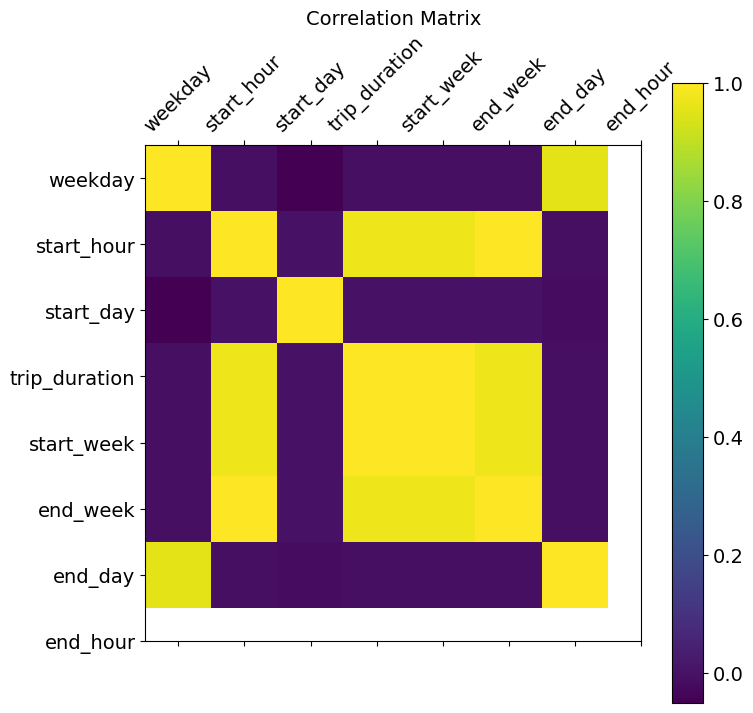

In [38]:
f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df_sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_sub.shape[1]), df_sub.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df_sub.shape[1]), df_sub.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

/var/folders/vy/7wyzrqvj1sbcxy4f8twmkdwc0000gn/T/ipykernel_46914/122055892.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = sns.heatmap(df_sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to


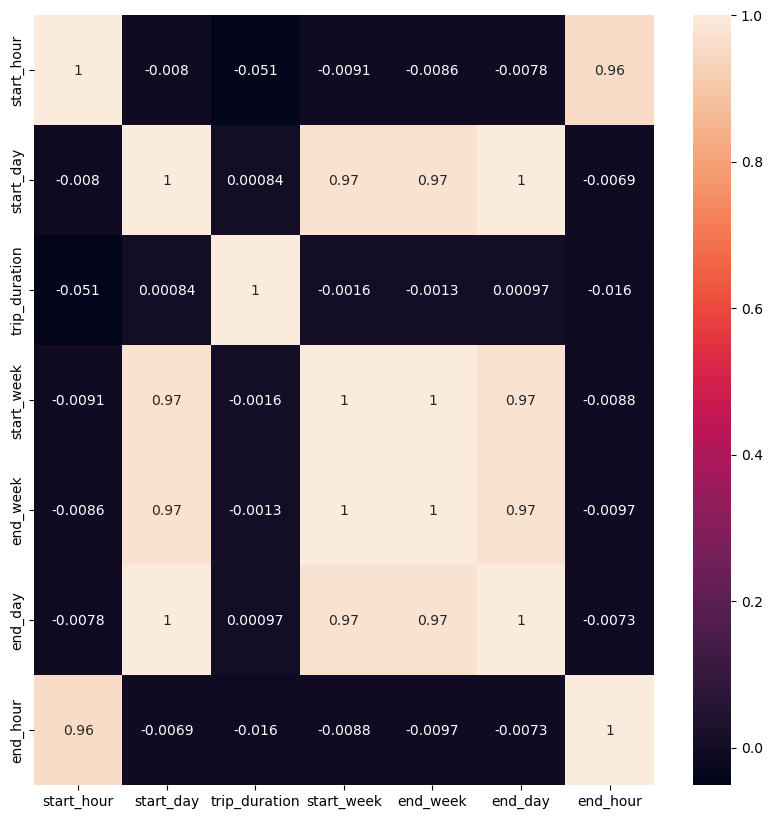

In [40]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

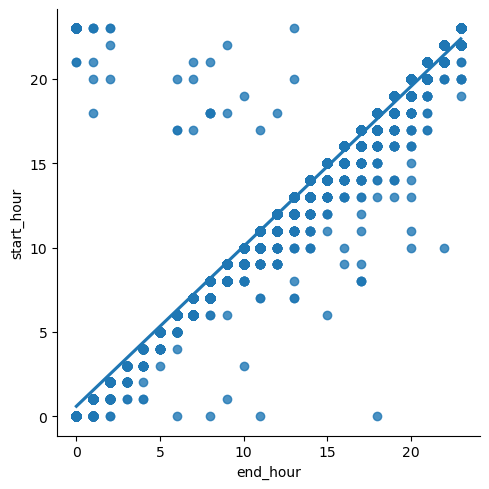

In [41]:
sns.lmplot(x = 'end_hour', y = 'start_hour', data = df_sub)

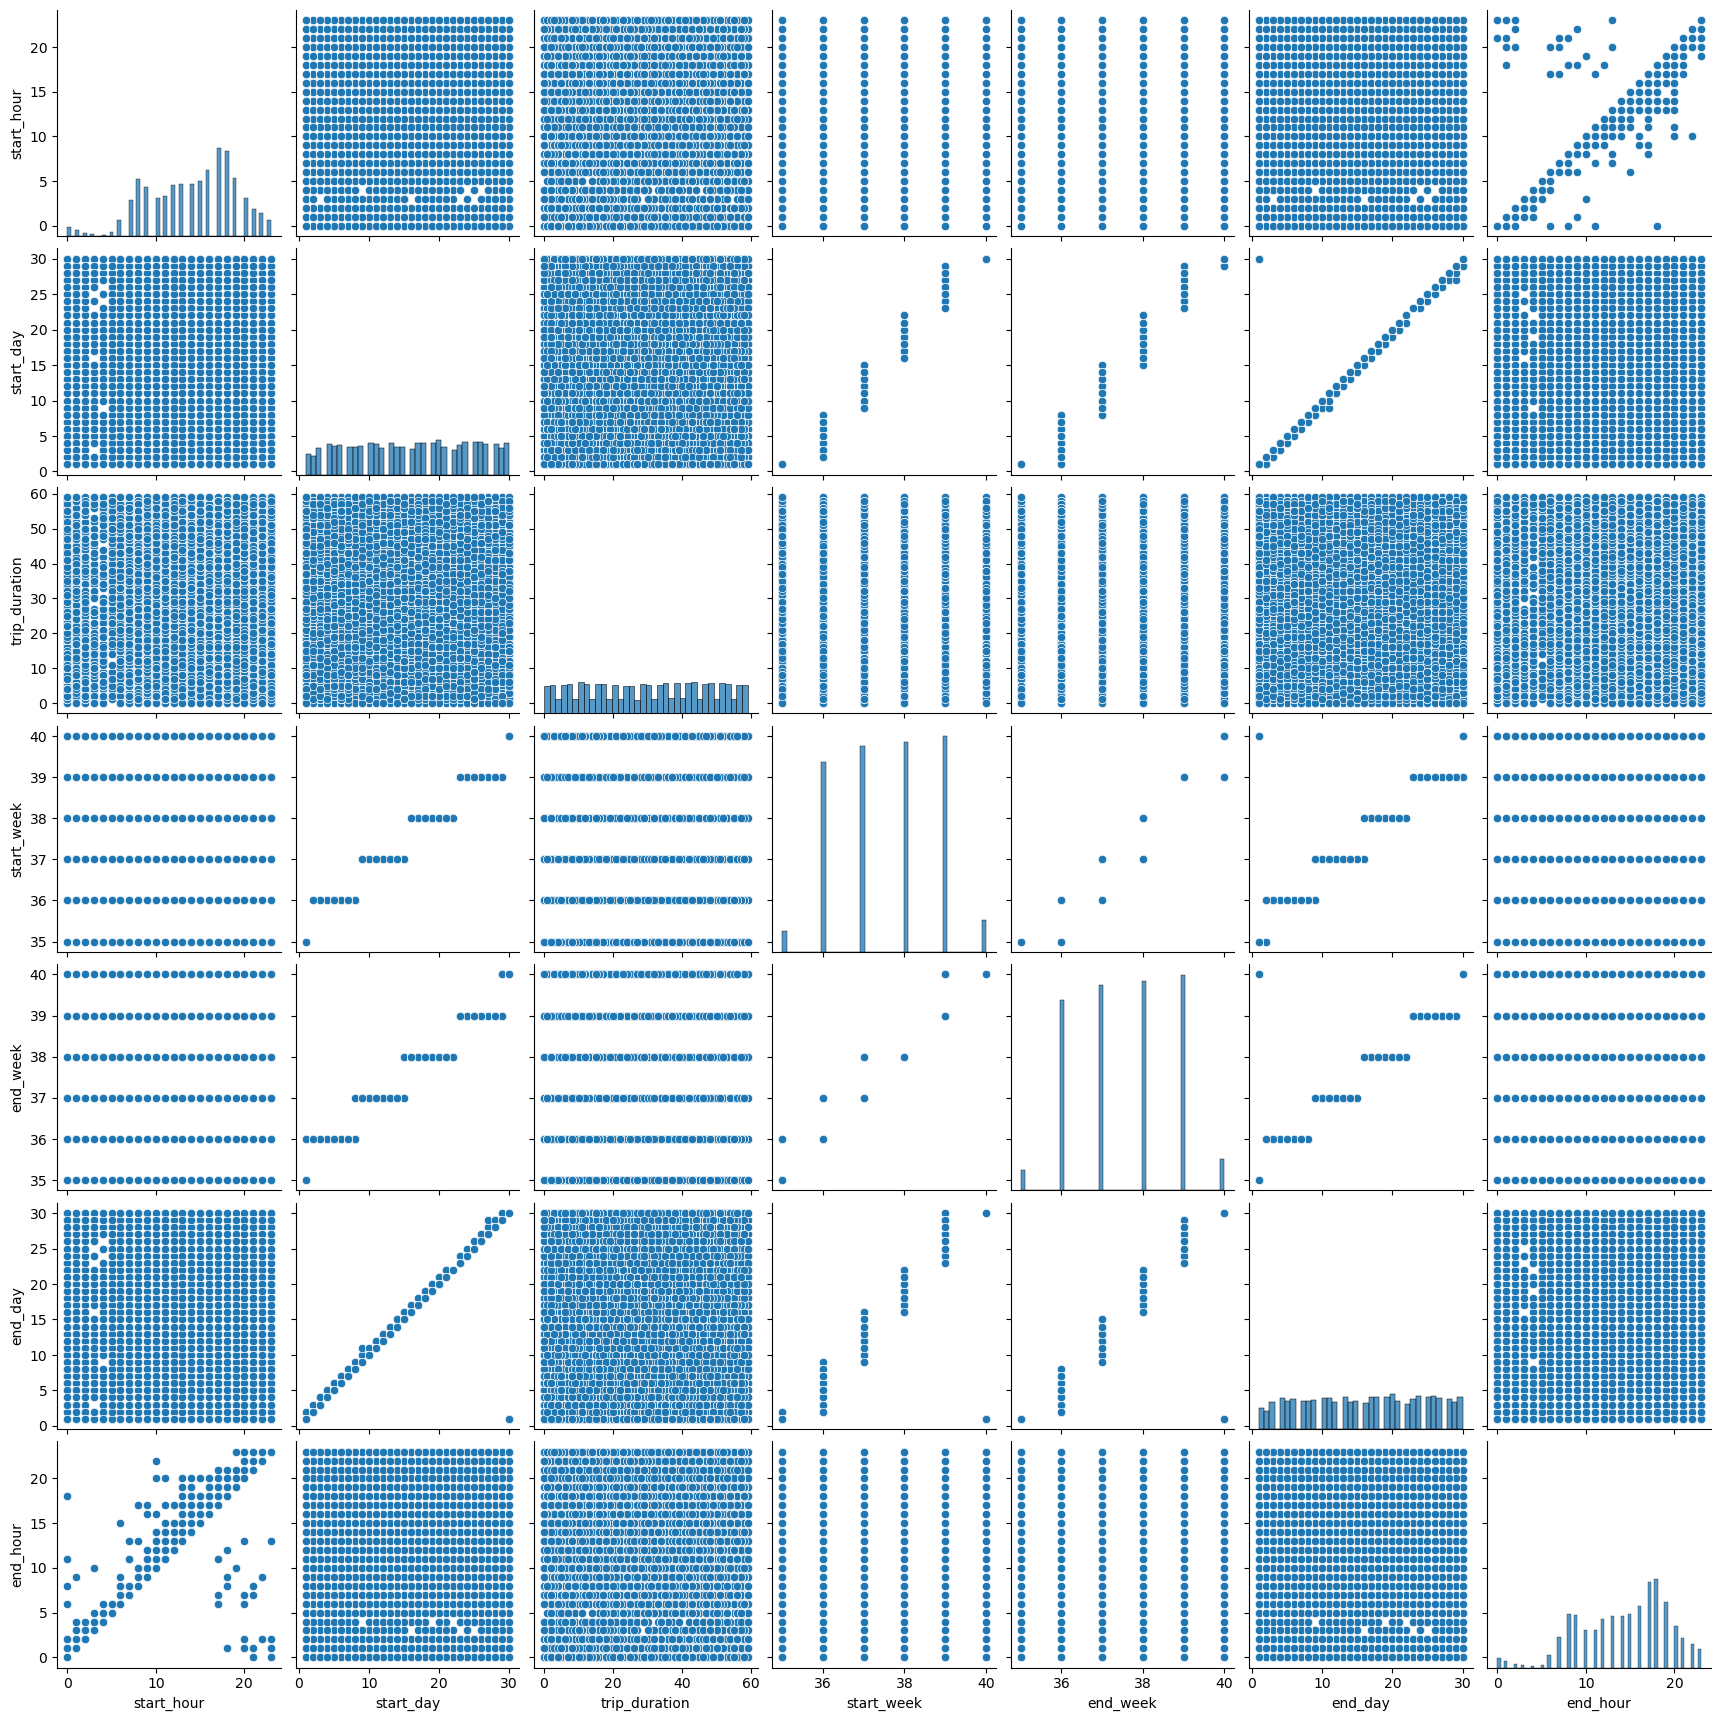

In [42]:
# Create a pair plot 

g = sns.pairplot(df_sub)

Some graphs skeew to the right showing an almost perfect linear correlation, however, as we evaluated earlier, some variables are conditioned to another but it does not show us any relevant information

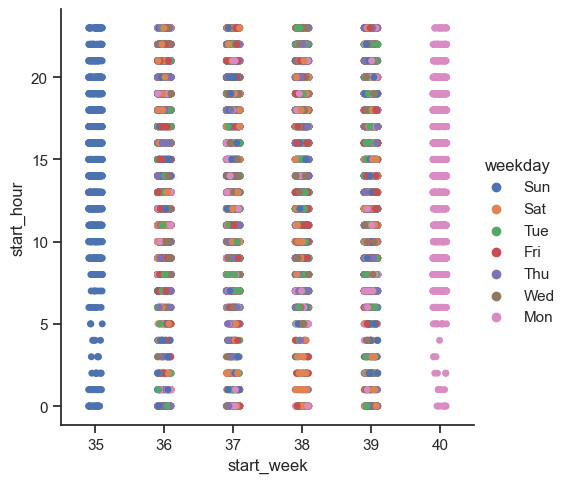

In [66]:
sns.set(style="ticks")
g = sns.catplot(x='start_week', y='start_hour', hue='weekday', data=df_sub)

When looking at the graph above we can disregard week 35 and 40, as they only have information about Sunday and Monday respectively, but when analyzing the other weeks, we can see a high frequency of activity on the days, Friday, Saturday and Sunday, which supports our hypothesis that on weekends the flow is higher.

The database selected for analysis consists mostly of time, location and nominal variables, with this, the correlation graphs do not show any sense, despite showing in some variables strong correlation, simply because one variable is conditioned to another, such as start_hour and end_hour, which in the case of a bicycle rental, it will always be necessary to exist both information. We conclude that correlation graphs may not be necessary for the hypotheses raised earlier.